## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [1]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins.head()


City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0        NaN     NaN   NaN      E         NaN          NaN          NaN  
1        NaN     NaN   NaN      E         NaN          NaN          NaN  
2        NaN     NaN   NaN      N         NaN          NaN          NaN  
3        NaN     NaN   NaN      N         NaN          NaN          NaN  
4        NaN     NaN   NaN      N         NaN          NaN          NaN  

[5 rows x 26 columns]

We first tidy the data, selecting columns and dropping null values. Also, we encode the labels.

In [2]:
from sklearn.preprocessing import LabelEncoder
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']
new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
new_pumpkins.dropna(inplace=True)
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  991 non-null    int64
 1   Package    991 non-null    int64
 2   Variety    991 non-null    int64
 3   Origin     991 non-null    int64
 4   Item Size  991 non-null    int64
 5   Color      991 non-null    int64
dtypes: int64(6)
memory usage: 54.2 KB


In [3]:
new_pumpkins.head()

City Name  Package  Variety  Origin  Item Size  Color
2          1        3        4       3          3      0
3          1        3        4      17          3      0
4          1        3        4       5          2      0
5          1        3        4       5          2      0
6          1        4        4       5          3      0

# Visualization - side-by-side grid

Let's visualize the dataframe in the notebook using Seaborn, which is built on Matplotlib.

Seaborn offers some neat ways to visualize your data. For example, we can compare distributions of the data for each point in a side-by-side grid by instantiating a PairGrid, using our pumpkin data new_pumpkins, followed by calling map():

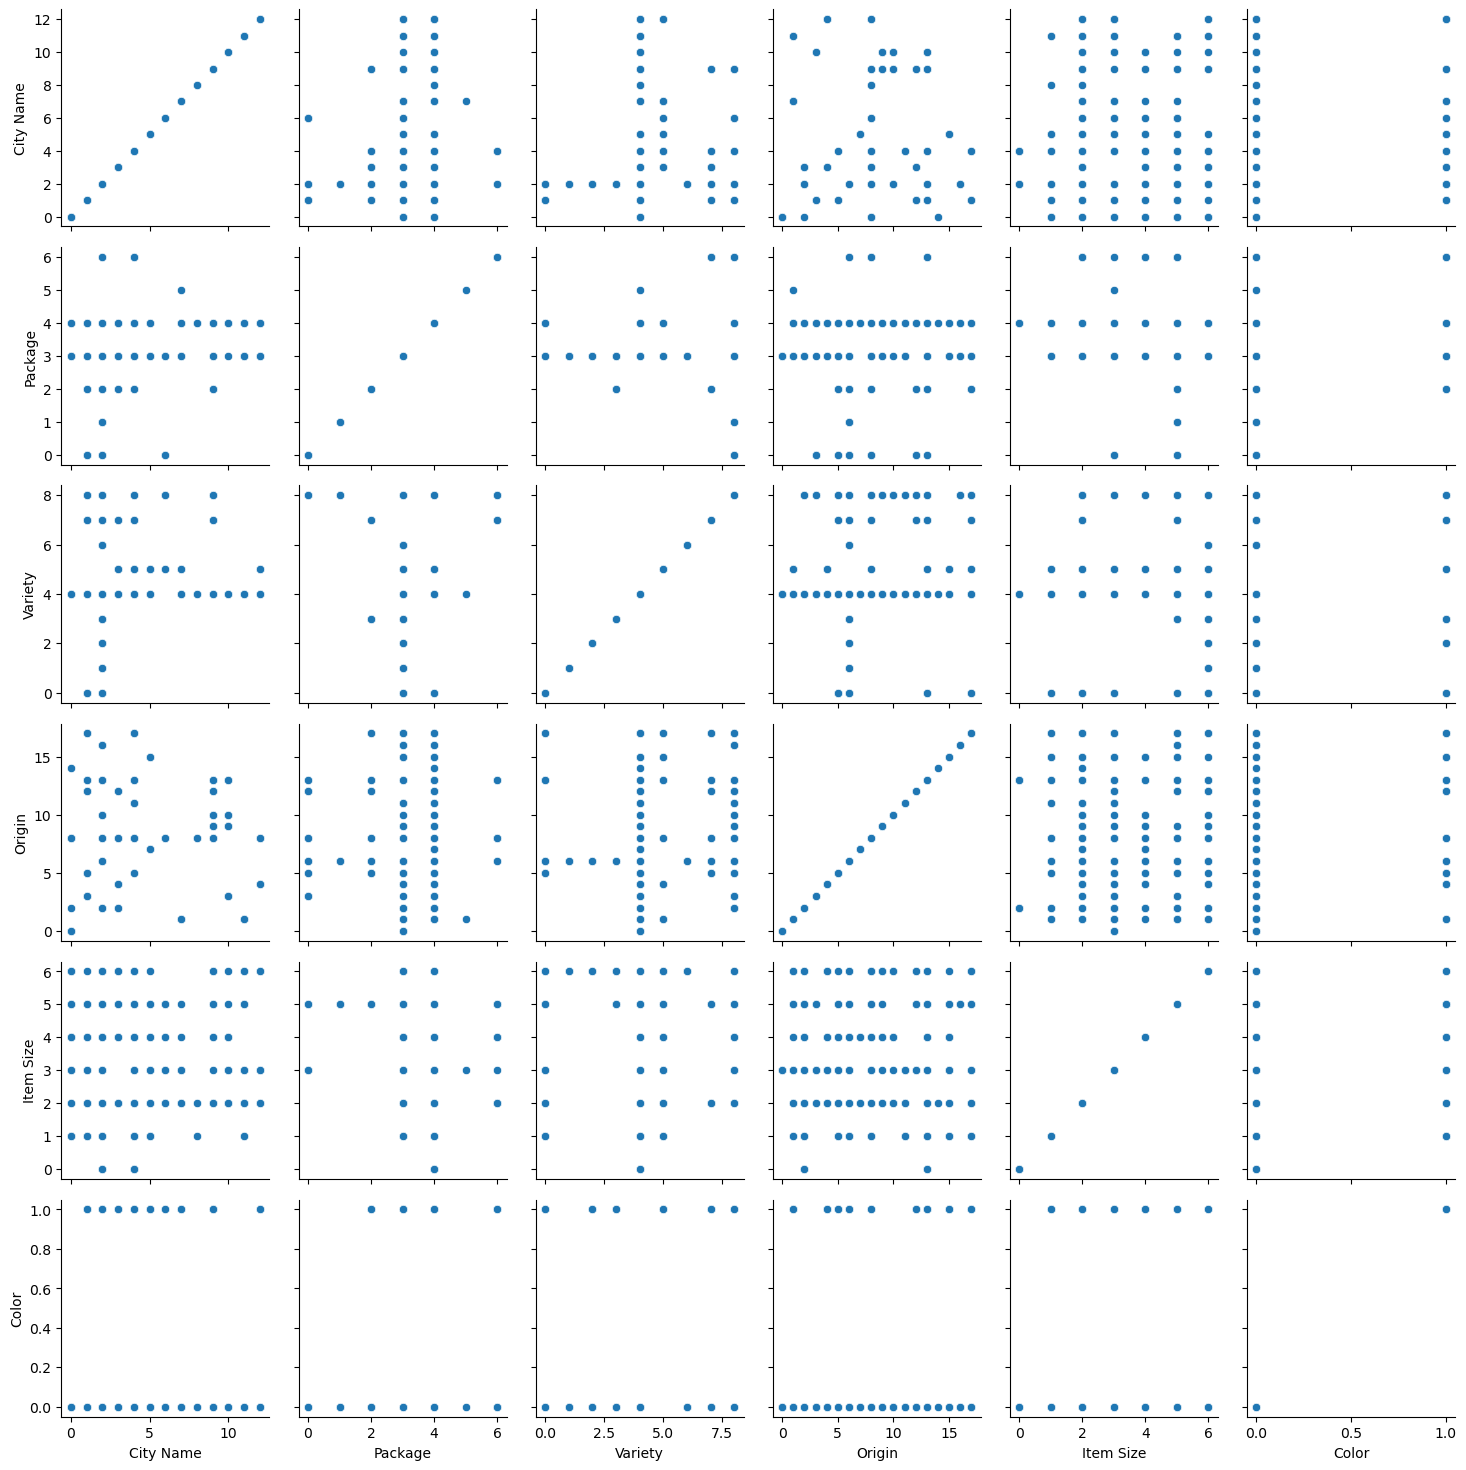

In [4]:
import seaborn as sns
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

By observing data side-by-side, we can see how the Color data relates to the other columns.

Given this scatterplot grid, what are some interesting explorations we can envision? So many. I can see how all the variables relate. 

# Swarm Plot

Since Color is a binary category (Orange or Not), it's called 'categorical data' and needs 'a more specialized approach to visualization'. There are other ways to visualize the relationship of this category with other variables.

We can visualize variables side-by-side with Seaborn plots.

Try a 'swarm' plot to show the distribution of values:



/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Color', ylabel='Item Size'>

/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lukmanaliyu/miniconda3/envs/arewads/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


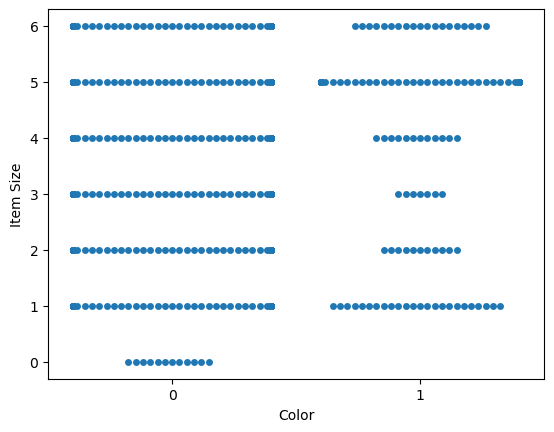

In [5]:
sns.swarmplot(x='Color',y='Item Size', data=new_pumpkins)

<AxesSubplot: xlabel='Color', ylabel='Item Size'>

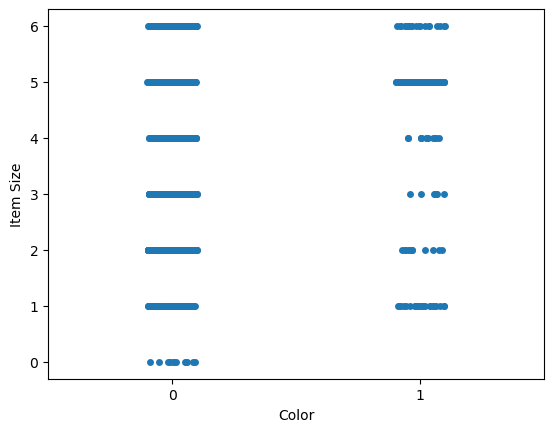

In [6]:
sns.stripplot(x='Color',y='Item Size',data=new_pumpkins)

# Violin Plot

A 'violin' type plot is useful as you can easily visualize the way that data in the two categories is distributed. Violin plots don't work so well with smaller datasets as the distribution is displayed more 'smoothly'.
We input as parameters x="Color", kind="violin" and call catplot():



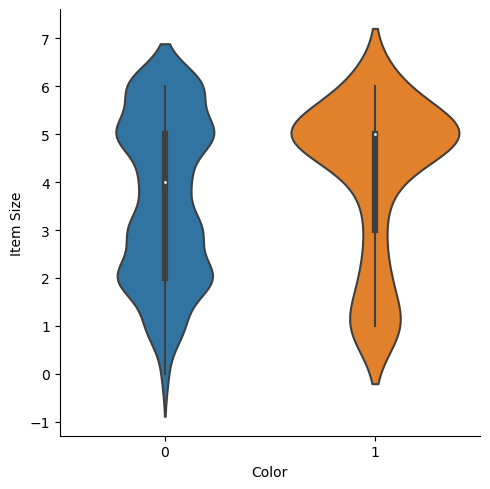

In [8]:
sns.catplot(x='Color',y='Item Size',kind='violin',data=new_pumpkins)

# Building the Model

In [9]:
new_pumpkins.head()

City Name  Package  Variety  Origin  Item Size  Color
2          1        3        4       3          3      0
3          1        3        4      17          3      0
4          1        3        4       5          2      0
5          1        3        4       5          2      0
6          1        4        4       5          3      0

In [16]:
from sklearn.model_selection import train_test_split
selected_features = ['Origin','Item Size','Variety','City Name','Package']
X = new_pumpkins[selected_features]
y = new_pumpkins['Color']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

 Training the model, by calling fit() with the training data, and printing out its result:

In [17]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print(f'Classification report: \n {classification_report(y_test,predictions)}')
print(f'Predicted labels: {predictions}')
print(f'Accurary: {accuracy_score(y_test,predictions):3.3}')


Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accurary: 0.814


Not too bad, since only about 800 rows of data were used to train the model

# Confusion Matrix

While you can get a scoreboard report terms by printing out the items above, you might be able to understand your model more easily by using a confusion matrix to help us understand how the model is performing.


ðŸŽ“ A 'confusion matrix' (or 'error matrix') is a table that expresses your model's true vs. false positives and negatives, thus gauging the accuracy of predictions.

To use a confusion matrix, call confusion_matrix()

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[162,   4],
       [ 33,   0]])

In Scikit-learn, confusion matrices Rows (axis 0) are actual labels and columns (axis 1) are predicted labels. 

|	|0|	1|
|--|--|--|
|0	|TN	|FP|
|1	|FN|TP|

Let's say our model is asked to classify pumpkins between two binary categories, category 'orange' and category 'not-orange'.

If your model predicts a pumpkin as not orange and it belongs to category 'not-orange' in reality we call it a true negative, shown by the top left number.
If your model predicts a pumpkin as orange and it belongs to category 'not-orange' in reality we call it a false negative, shown by the bottom left number.
If your model predicts a pumpkin as not orange and it belongs to category 'orange' in reality we call it a false positive, shown by the top right number.
If your model predicts a pumpkin as orange and it belongs to category 'orange' in reality we call it a true positive, shown by the bottom right number.
As you might have guessed it's preferable to have a larger number of true positives and true negatives and a lower number of false positives and false negatives, which implies that the model performs better.

How does the confusion matrix relate to precision and recall? Remember, the classification report printed above showed precision (0.83) and recall (0.98).

Precision = tp / (tp + fp) = 162 / (162 + 33) = 0.8307692307692308

Recall = tp / (tp + fn) = 162 / (162 + 4) = 0.9759036144578314

âœ… Q: According to the confusion matrix, how did the model do? A: Not too bad; there are a good number of true negatives but also several false negatives.

Let's revisit the terms we saw earlier with the help of the confusion matrix's mapping of TP/TN and FP/FN:

ðŸŽ“ Precision: TP/(TP + FP) The fraction of relevant instances among the retrieved instances (e.g. which labels were well-labeled)

ðŸŽ“ Recall: TP/(TP + FN) The fraction of relevant instances that were retrieved, whether well-labeled or not

ðŸŽ“ f1-score: (2 * precision * recall)/(precision + recall) A weighted average of the precision and recall, with best being 1 and worst being 0

ðŸŽ“ Support: The number of occurrences of each label retrieved

ðŸŽ“ Accuracy: (TP + TN)/(TP + TN + FP + FN) The percentage of labels predicted accurately for a sample.

ðŸŽ“ Macro Avg: The calculation of the unweighted mean metrics for each label, not taking label imbalance into account.

ðŸŽ“ Weighted Avg: The calculation of the mean metrics for each label, taking label imbalance into account by weighting them by their support (the number of true instances for each label).


Can you think which metric you should watch if you want your model to reduce the number of false negatives?

## Visualize Model ROC curve

This is not a bad model; its accuracy is in the 80% range so ideally you could use it to predict the color of a pumpkin given a set of variables.

Let's do one more visualization to see the so-called 'ROC' score:

<AxesSubplot: >

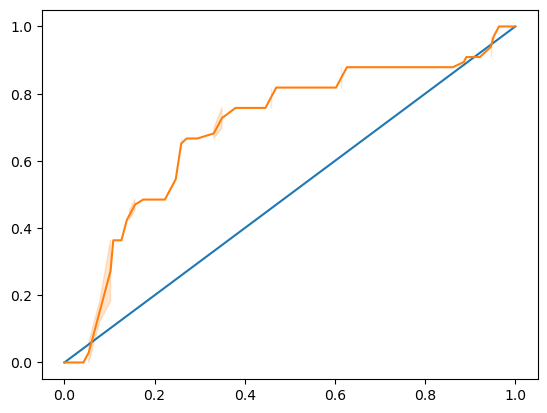

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
y_scores = model.predict_proba(X_test)
# calculate the roc curve
fpr,tpr,thresholds = roc_curve(y_test,y_scores[:,1])
sns.lineplot(x=[0,1],y =[0,1])
sns.lineplot(x =fpr,y= tpr)

Finally, we use Scikit-learn's roc_auc_score API to compute the actual 'Area Under the Curve' (AUC):

In [24]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


The result is 0.6976998904709748. Given that the AUC ranges from 0 to 1, we want a big score, since a model that is 100% correct in its predictions will have an AUC of 1; in this case, the model is pretty good.

And we've done it. First logistic regression model!!!